In [ ]:
#Import packages
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [ ]:
#Load dataset. Find data at "https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download"
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Check for missing entries and remove unused column
df.isna().any()
df = df.drop('Unnamed: 32', axis=1)

In [ ]:
from sklearn import preprocessing

#Encode categorical column using integers
lab_enc = preprocessing.LabelEncoder()

df['diagnosis_enc'] = lab_enc.fit_transform(df['diagnosis'])

lab_enc.classes_

array(['B', 'M'], dtype=object)

In [ ]:
#Get features and labels to separate frames
X = df.drop(['id', 'diagnosis', 'diagnosis_enc'], axis=1)

Y = df['diagnosis_enc']

In [ ]:
from sklearn.model_selection import train_test_split

#Perform train test split in the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Perform standardization
scaler = StandardScaler()

scaler.fit(x_train)

X_train_norm = scaler.transform(x_train)

X_test_norm = scaler.transform(x_test)

In [ ]:
#Create model class using sequential
model = keras.Sequential()

#Add two hidden layers with 32 neurons
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(32, activation = 'relu'))

#Output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))

#Compile with loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#Print model summary
model.summary()

In [ ]:
#Train the model for 200 epochs
hist = model.fit(x_train, y_train, epochs=200, validation_data = (x_test, y_test))

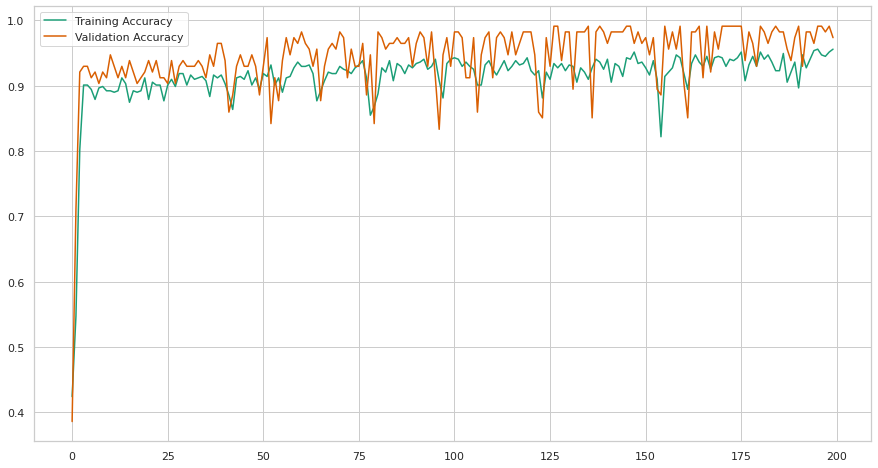

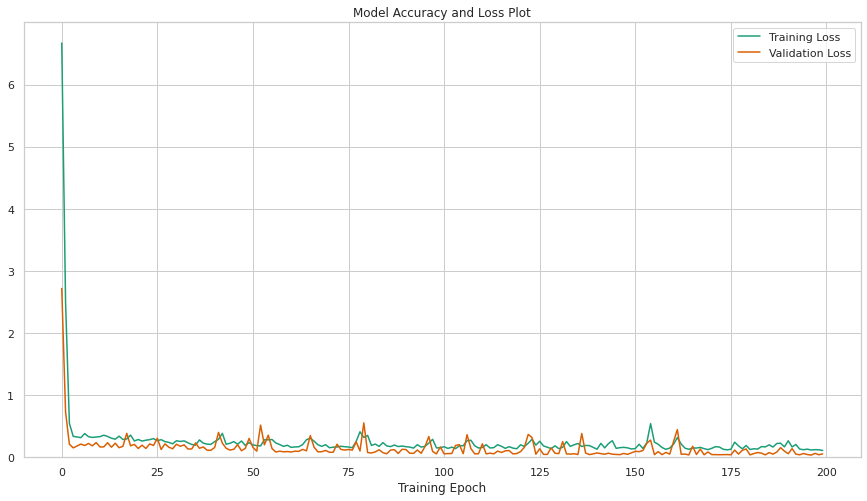

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot loss and accuracy for train and validation data
sns.set_theme(style='whitegrid', palette = 'Dark2')
plt.figure(figsize=(15, 8))
plt.plot(hist.history['acc'], label='Training Accuracy')
plt.plot(hist.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.figure(figsize=(15, 8))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss Plot')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Class labels
labels = ['Benign', 'Malignant']

#Perform prediction
model_pred = model.predict(x_test) > 0.5

#Create classification report
print(classification_report(model_pred, y_test, target_names=[l for l in labels]))

              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98        77
   Malignant       0.93      1.00      0.96        37

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



Text(0.5, 70.72222222222221, 'Predictions')

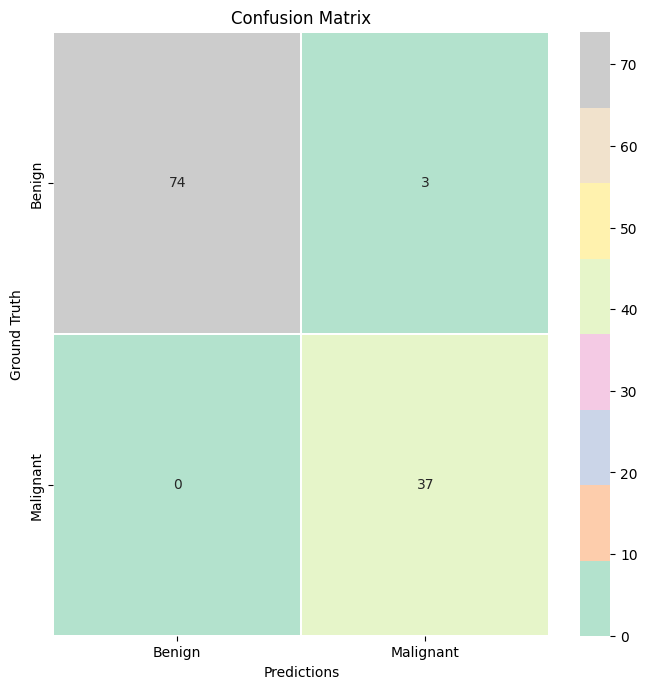

In [ ]:
#Calculate and plot confusion matrix
conf_mat = confusion_matrix(model_pred, y_test)
plt.figure(figsize=(8, 8),dpi=100)
sns.heatmap(conf_mat,
            cmap='Pastel2',
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Predictions')